## HITS

In [147]:
from collections import defaultdict
import logging
import operator
import re

%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

import networkx as nx
from networkx.algorithms import community

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/venv3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [139]:
G = nx.read_gpickle('/mnt/permanent/home/makrai/project/TextBetweenness/mnsz_10k-sent.gpickle')

In [148]:
logging.info('')
hubs, auths = nx.algorithms.link_analysis.hits(G)
logging.info('')

In [209]:
def sort_by_value(dict_):
    return sorted(dict_.items(), key=operator.itemgetter(1), reverse=True)


def head(dict_):
    items = sort_by_value(dict_)[10:5000]
    keys, _ = zip(*items)
    return keys, dict(items)


def plot_against_degree(cent, background=None):
    if background is None:
        background = nx.degree_centrality(G)
    ws_dg, dgr = head(background)
    ws_bt, btw = head(cent)
    ws = [w for w in ws_dg if w in ws_bt]
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(
        [dgr[wd] for wd in ws],
        [btw[wd] for wd in ws],
        c=[pos_color[pos[wd]] for wd in ws],
        s=[40 if pos[wd] in ['CONJ', 'VERB'] else 5 for wd in ws]
    )
    for wd in ws:
        if pos[wd] in ['CONJ', 'VERB'] and (dgr[wd] > .002 or random.random() < .05):
            plt.annotate(wd, (dgr[wd], btw[wd]))
    plt.xlabel('fokszám')
    plt.ylabel('tekintély')
    plt.savefig('paper/conv-verb-auth.png')

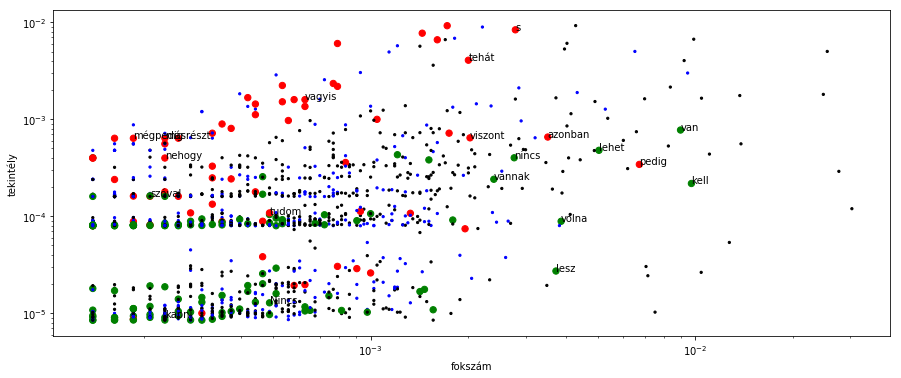

In [210]:
plot_against_degree(auths)

In [133]:
def read_pos_dict():
    pos_d = defaultdict(lambda: 'unk')
    with open('/mnt/permanent/Language/Hungarian/Crawl/Web2/ana/all_morphtable', encoding='latin2') as infile:
        for i, line in enumerate(infile):
            try:
                word, w_per_ana = line.strip().split()
                ana = re.findall('[A-Z][A-Z]+', w_per_ana)[0]
                pos_d[word] = ana
            except:
                continue
    return pos_d

In [134]:
pos = read_pos_dict()

In [136]:
print(set(pos.values()))

{'ORTH', 'POSTP', 'MTA', 'NOUN', 'US', 'DET', 'YHWH', 'VERB', 'URL', 'UTT', 'PUNCT', 'ANS', 'WHO', 'SZTK', 'GDP', 'DDR', 'UNESCO', 'SZDSZ', 'FC', 'NKVD', 'ADSL', 'RISC', 'BMW', 'MNK', 'ADV', 'NSDAP', 'WC', 'NASA', 'NUM', 'USD', 'WAP', 'FTC', 'MI', 'MTV', 'IBM', 'MLSZ', 'OO', 'EWG', 'MSZP', 'PV', 'GU', 'GNU', 'OECD', 'CONJ', 'VO', 'ONO', 'PC', 'XP', 'NTSC', 'GSM', 'MTK', 'USA', 'CD', 'OTP', 'EU', 'MDF', 'MV', 'UEFA', 'VHS', 'LXX', 'DVD', 'SZKP', 'CIA', 'ISO', 'ADJ', 'BKV', 'NATO', 'PREV', 'LCD', 'KZ', 'ART', 'PREP', 'BM', 'UNKNOWN', 'RTL', 'OTKA', 'KB', 'DTP', 'AP'}


In [73]:
pos_color = defaultdict(lambda: 'k')
pos_color.update({
    #'ADJ', 'ADV', 'ART', 
    'CONJ': 'r',
    'NOUN': 'b',
    #'NUM', 'POSTP', 'PREV', 
    'VERB': 'g'})

In [104]:
import string

In [126]:
re.findall('[a-z]+', 'a/b[c]')

['a', 'b', 'c']